In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [55]:
url = 'https://drive.google.com/uc?id=1pDY_86K06c7b1QpRC-yOiifPxUzxl5oV'
df = pd.read_csv(url)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [19]:
features = ["housing_median_age",	"total_rooms",	"total_bedrooms",
            "population", "households",	"median_income",	"median_house_value",
            "ocean_proximity"]

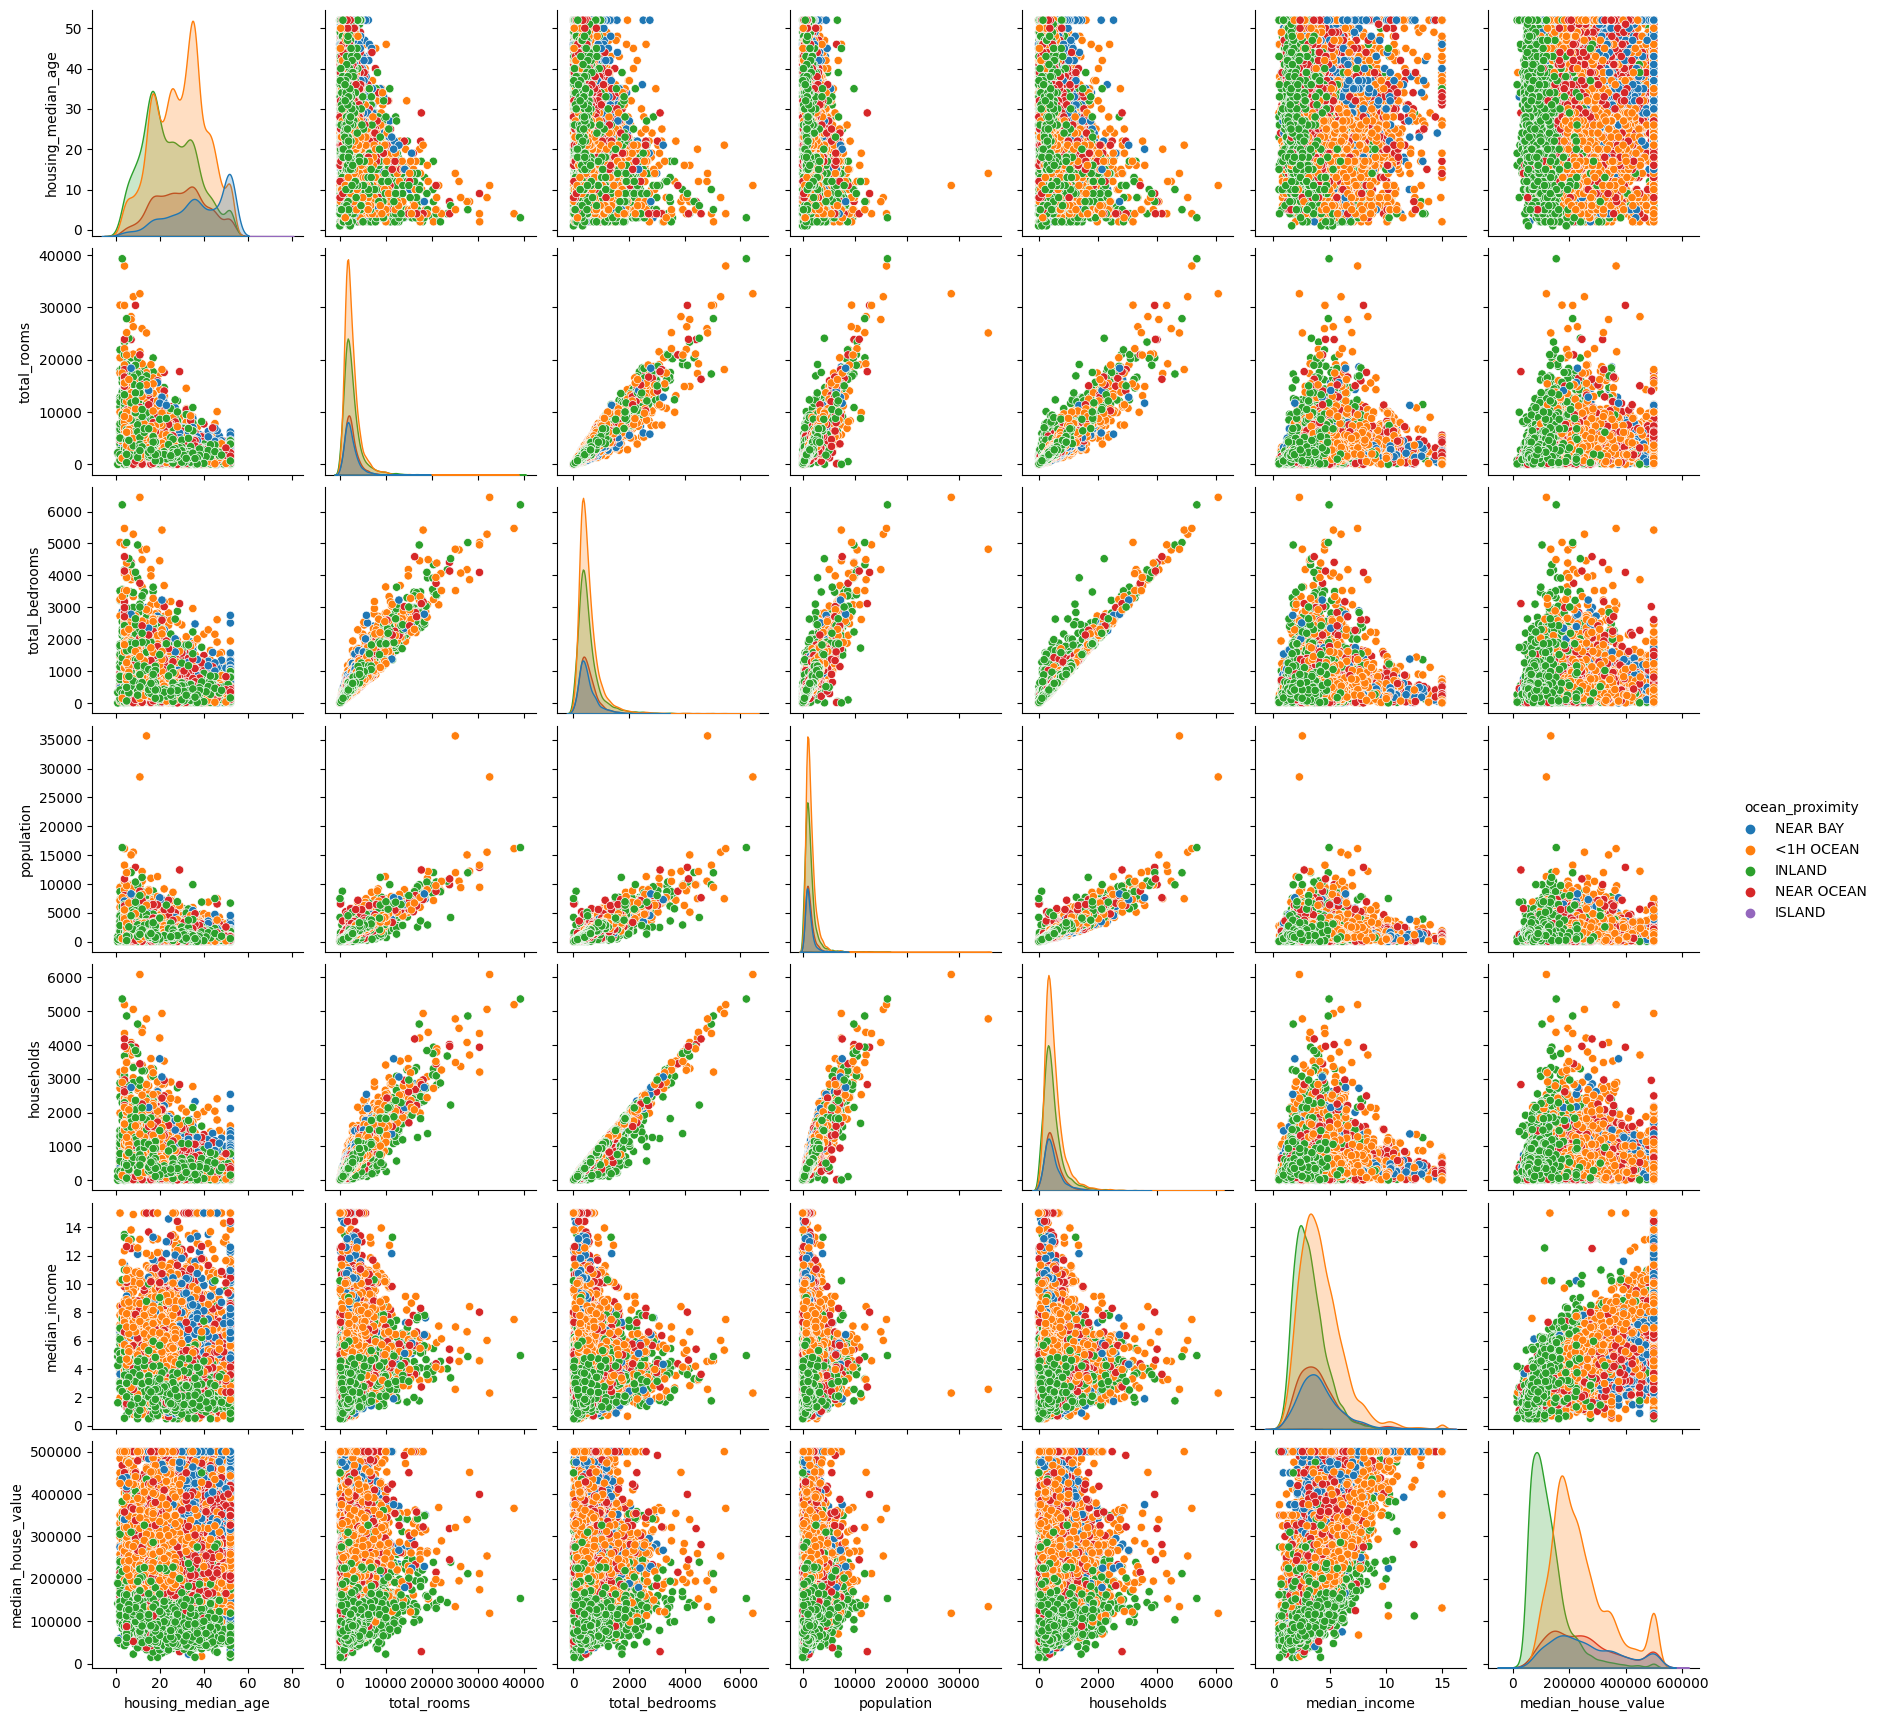

In [20]:
sns.pairplot(df[features], hue="ocean_proximity")

<Axes: xlabel='housing_median_age', ylabel='Count'>

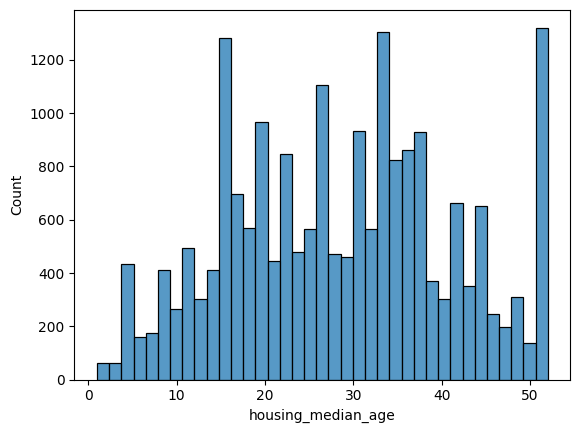

In [116]:
sns.histplot(df["housing_median_age"])

<Axes: xlabel='median_income', ylabel='Count'>

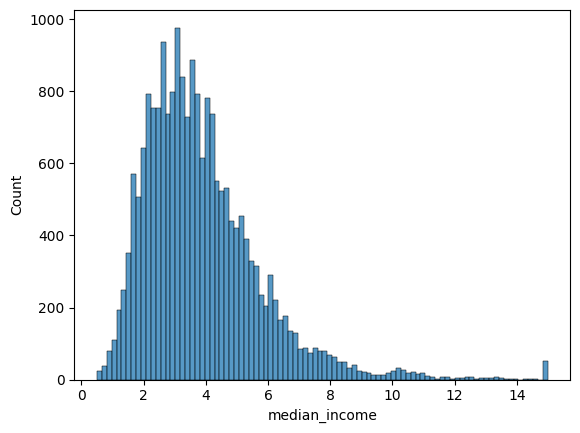

In [117]:
sns.histplot(df["median_income"])

<Axes: xlabel='median_house_value', ylabel='Count'>

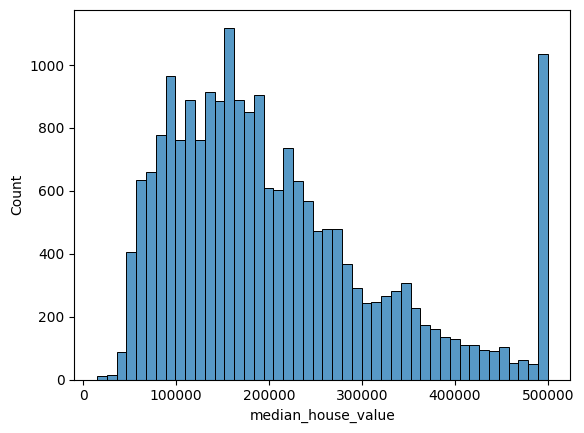

In [118]:
sns.histplot(df["median_house_value"])

In [121]:
selected_features = ["housing_median_age", 'median_income', 'median_house_value']
X = df[["housing_median_age", 'median_income']]
y = df['median_house_value']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [112]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

lr_r2 = r2_score(y_test, y_pred)
lr_rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)))

print("Linear Regression: R2", lr_r2)
print("Linear Regression: RMSE", lr_rmse)

Linear Regression: R2 0.508740578668139
Linear Regression: RMSE 80299


In [120]:
parameters = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              "fit_intercept": [True, False],
              "penalty": ['l2', 'l1', 'elasticnet', None],
              "learning_rate": ['constant', 'optimal',
                                'invscaling', 'adaptive']
             }
sgdr = SGDRegressor();
grid = GridSearchCV(estimator=sgdr, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=SGDRegressor(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'penalty': ['l2', 'l1', 'elasticnet', None]})

In [123]:
sgdr = SGDRegressor(**grid.best_params_)
sgdr.fit(X_train, y_train)
y_pred = sgdr.predict(X_test)

sgdr_r2 = r2_score(y_test, y_pred)
sgdr_rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)))

print("SGDRegressor: R2", sgdr_r2)
print("SGDRegressor: RMSE", sgdr_rmse)

SGDRegressor: R2 0.5086611493522423
SGDRegressor: RMSE 80306
